<a href="https://colab.research.google.com/github/anhtruong1209/Deep-Learning/blob/master/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
pwd

'/content'

In [ ]:
cd /content/gdrive/MyDrive/Colab Notebooks/DoExWithMnist


/content/gdrive/MyDrive/Colab Notebooks/DoExWithMnist


In [ ]:
import tensorflow as tf 
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
import matplotlib.pyplot as plt


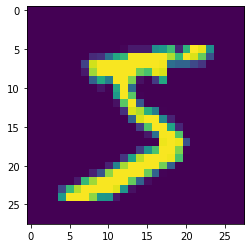

In [ ]:
plt.imshow(x_train[0])

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_train[0].shape

(28, 28)

In [ ]:
x_train, x_test = x_train / 255.0, x_test / 255.0 

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
width = 28
height = 28 
classes = 1

In [ ]:
shape = (width, height, classes)

In [ ]:

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3) ,activation="relu",input_shape= shape),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation= "relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [ ]:
a = model.summary()
a

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               692352    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________


In [ ]:
x_train.shape
# dua vao 4 chieu
x_train = x_train.reshape(60000,28,28,1)

In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
x_test = x_test.reshape(10000,28,28,1)

In [ ]:
y_train.shape

(60000,)

In [ ]:
y_train[0]

5

In [ ]:
model.compile(
              optimizer="adam",
              loss = "sparse_categorical_crossentropy",
              metrics =  ["acc"])

In [ ]:
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 36s 3ms/step - loss: 0.1551 - acc: 0.9535 - val_loss: 0.0600 - val_acc: 0.9812
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0522 - acc: 0.9845 - val_loss: 0.0572 - val_acc: 0.9803
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0337 - acc: 0.9892 - val_loss: 0.0431 - val_acc: 0.9857
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0224 - acc: 0.9929 - val_loss: 0.0497 - val_acc: 0.9843
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0148 - acc: 0.9953 - val_loss: 0.0586 - val_acc: 0.9816
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0117 - acc: 0.9957 - val_loss: 0.0446 - val_acc: 0.9870
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0078 - acc: 0.9975 - val_loss: 0.0442 - val_acc: 0.9883
Epoch 8/10
1875/1875 [==============================] - 5s 3m

In [ ]:
model.save("mnist.h5")

In [ ]:
saved = tf.keras.models.load_model("mnist.h5")
result = saved.predict(x_test[1000:1001])

In [ ]:
result

array([[8.6089816e-12, 6.0088458e-12, 2.8028236e-15, 5.4508911e-07,
        6.7432858e-08, 6.7905048e-10, 5.0801478e-19, 3.9892907e-06,
        9.6166693e-14, 9.9999535e-01]], dtype=float32)

In [ ]:
import numpy as np
final = np.argmax(result)

In [ ]:
final

9

In [ ]:
x_test.shape

(10000, 28, 28, 1)

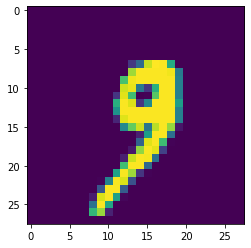

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(x_test.reshape(10000,28,28)[1000])